## **Session 9**
**16, 17 and 19 December 2023**
# Linear Algebra

## **Linear Transformations and Linear Algebra in Neural Networks**

Today, we shall unravel:
- the notion of **linear tranformations** and their significance,
- as well as understand how linear algebra plays in **neural networks**!

## **Linear Transformations**

Linear transformations are **mathematical operations** that **preserve the properties** of:
- **vector addition**, and
- **scalar multiplication**.

In other words, a transformation is linear if it maintains the structure of vector spaces, where vectors can be added together and scaled by scalars while following certain rules.

A **linear transformation T from vector space V to vector space W satisfies two conditions**:

- **Additivity**: T(u + v) = T(u) + T(v) for all vectors u and v in V.
- **Homogeneity**: T(k * u) = k * T(u) for all scalar k and vector u in V.

In simpler terms, a linear transformation preserves vector addition and scalar multiplication.

**Example**:

Consider a 2D space and a **transformation** that **doubles the x-coordinates** of vectors while leaving the **y-coordinates unchanged**:

- *T([x, y]) = [2x, y]*

This transformation doubles the x-coordinate of any vector while keeping the y-coordinate the same.

### **Let's perform** this transformation using a specific vector:

- **Original vector**: [3, 4]

- **Transformed vector**: T([3, 4]) = [2 * 3, 4] = [6, 4]

In [1]:
import numpy as np
# Define the transformation matrix
transformation_matrix = np.array([[2, 0],
                                  [0, 1]])

# Define the original vector
original_vector = np.array([3, 4])

# Apply the transformation
transformed_vector = np.dot(transformation_matrix, original_vector)

print("Original Vector:")
print(original_vector)

print("\nTransformed Vector:")
print(transformed_vector)

Original Vector:
[3 4]

Transformed Vector:
[6 4]


### **Isn't linear transformation essentially a linear combination?**

Yes. However, the key difference between a linear combination and a linear transformation is:

- **Linear combination** - Multiplies vectors with scalars and adds those. Operates within a single vector space, combining vectors with scalars to produce vectors in the same space.
- **Linear transformation** - Maps vectors from one vector space to another, combining input vectors to produce output vectors potentially in a different space, while oberving **additivity**, **homogeneity**.

### **Why does mapping to same or different space matters?**

The main reason why it matters that linear transformations map between different vector spaces, while linear combinations operate within one space, is that:

- Different spaces allow encoding meaningful coordinate system transformations like rotations, projections, embeddings etc. that reveal deeper geometric structure.
- Mapping between different structured spaces lets you analyze relationships and conversions between the spaces - like inputs and outputs of a system.
- Real world applications often involve conversions or mappings between different forms or formats of data.
- Having different spaces gives more flexibility to construct mathematical models of these conversions and relationships.

In contrast, linear combinations within a single space cannot capture these aspects of transforming and converting structured representations.

So essentially, the power of linear transformations comes from mapping between meaningfully different vector spaces, rather than just combining within one fixed space. This enables modeling real-world relationships and transformations.

<div align="center">

| Aspect                   | Linear Combinations                                        | Linear Transformations                                   |
|--------------------------|------------------------------------------------------------|----------------------------------------------------------|
| Definition               | Combining vectors by scaling and adding them              | Applying transformations to vectors                     |
| Operation                | Vector addition and scalar multiplication                 | Matrix-vector multiplication                            |
| Output                   | Produces a vector in the same vector space                | Produces a vector in a different vector space           |
| Dimensionality           | Preserves dimensionality                                  | May change the dimensionality of vectors                |
| Geometric Interpretation | Forms a straight line or plane passing through the origin | May involve rotations, scaling, shearing, or reflections |
| Closure under Operation  | Closed under linear combinations                         | Not necessarily closed under all transformations        |
| Independence             | Vectors may be linearly dependent or independent          | Transformation matrices may be invertible or not        |
| Inverse                  | No unique inverse (unless special cases)                 | Inverse may exist for invertible transformations        |
| Composition              | Linear combinations can be composed                      | Linear transformations can be composed                  |

</div>

### **Regression: An Example**

In regression, the goal is to model the relationship between input variables and a continuous output variable. Linear regression, for example, involves finding a linear mapping or transformation from the input space to the output space.

**Scenario 1: Linear Combination within the Same Space**
In a basic linear regression scenario, you might have a dataset with features (input variables) and a target variable (output). The linear regression model operates within the same space:

In [3]:
# Example code using scikit-learn
from sklearn.linear_model import LinearRegression
import numpy as np

# Generate some random data
np.random.seed(42)
X = np.random.rand(100, 1)  # Input feature
y = 2 * X + 1 + 0.1 * np.random.randn(100, 1)  # Linear relationship with noise

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Coefficients of the linear regression model
slope = model.coef_[0][0]
intercept = model.intercept_[0]

print(f"Linear Regression within the same space: y = {slope:.2f} * X + {intercept:.2f}")


Linear Regression within the same space: y = 1.95 * X + 1.02


In this case, the linear regression model finds the coefficients (slope and intercept) to represent the linear relationship within the same space.

**Scenario 2: Mapping to a Different Space for Polynomial Regression**
Now, consider a scenario where you want to perform polynomial regression, i.e., model a quadratic relationship. You can achieve this by mapping the input feature to a different space:

In [4]:
# Mapping input feature to a higher-dimensional space
X_poly = np.column_stack((X, X**2))

# Fit a linear regression model on the mapped space
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

# Coefficients of the polynomial regression model
coefficients_poly = model_poly.coef_[0]
intercept_poly = model_poly.intercept_[0]

print(f"Polynomial Regression in a different space: y = {coefficients_poly[1]:.2f} * X^2 + {coefficients_poly[0]:.2f} * X + {intercept_poly:.2f}")

Polynomial Regression in a different space: y = 0.23 * X^2 + 1.73 * X + 1.06


In this example, by mapping the input feature `X` to a higher-dimensional space (adding a squared term), you allow the linear regression model to capture a quadratic relationship.

This demonstrates how mapping to different spaces provides flexibility in capturing and modeling more complex relationships, such as polynomial relationships, which cannot be expressed with simple linear combinations in the original space.

### **What are basis vectors and how do they relate to linear transformation?**

- Basis vectors, often denoted as i-hat (î) and j-hat (ĵ), are special vectors that form the building blocks for describing other vectors in a vector space.
- They are typically chosen as a set of linearly independent vectors that span the space.
- In a two-dimensional Cartesian coordinate system, î represents the unit vector in the positive x-direction, and ĵ represents the unit vector in the positive y-direction.
- These basis vectors provide a framework for describing vectors in terms of their components along these directions.

**Basis vectors are closely related to linear transformations, particularly when it comes to representing how linear transformations affect vectors in terms of these basis vectors. The transformed basis vectors help define the transformed space under the linear transformation**.

**Example**:

Let's consider a linear transformation that rotates a vector counterclockwise by 45 degrees. We'll explore how this transformation affects the basis vectors î and ĵ.

<sub>* sqrt(2)/2 is the sine/cosine of a 45 degree angle</sub>

In [6]:
# Define the transformation matrix
transformation_matrix = np.array([[np.sqrt(2)/2, np.sqrt(2)/2],
                                  [np.sqrt(2)/2, np.sqrt(2)/2]])

# Define the basis vectors
i_hat = np.array([1, 0])
j_hat = np.array([0, 1])

# Apply the transformation to the basis vectors
transformed_i_hat = np.dot(transformation_matrix, i_hat)
transformed_j_hat = np.dot(transformation_matrix, j_hat)

print("Original i-hat:")
print(i_hat)

print("\nOriginal j-hat:")
print(j_hat)

print("\nTransformed i-hat:")
print(transformed_i_hat)

print("\nTransformed j-hat:")
print(transformed_j_hat)


Original i-hat:
[1 0]

Original j-hat:
[0 1]

Transformed i-hat:
[0.70710678 0.70710678]

Transformed j-hat:
[0.70710678 0.70710678]


### Example: rotation transformation

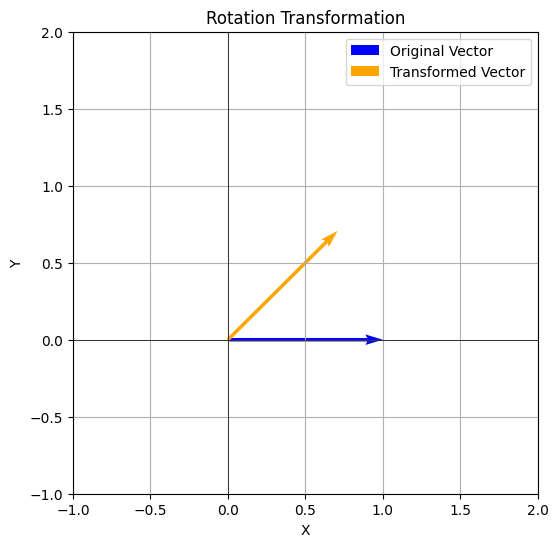

In [7]:
import matplotlib.pyplot as plt
# Original vector
vector = np.array([1, 0])

# Transformation matrix for rotating 45 degrees counterclockwise
angle = np.pi / 4
transformation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                  [np.sin(angle), np.cos(angle)]])

# Apply the transformation
transformed_vector = np.dot(transformation_matrix, vector)

# Plot the vectors
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Original Vector')
plt.quiver(0, 0, transformed_vector[0], transformed_vector[1], angles='xy', scale_units='xy', scale=1, color='orange', label='Transformed Vector')
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid()
plt.legend()
plt.title("Rotation Transformation")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


### Example: scaling transformation

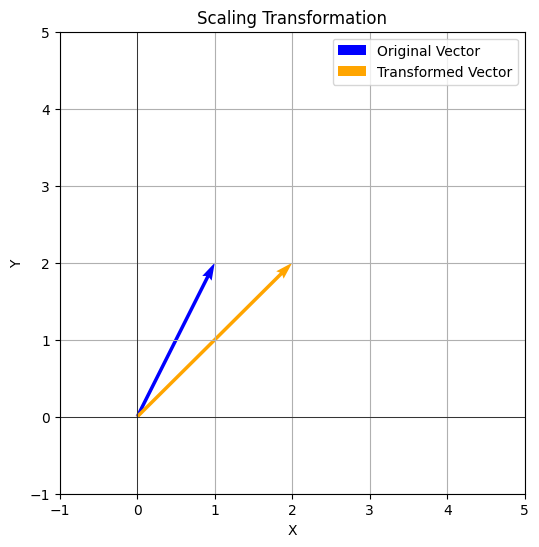

In [8]:
# Original vector
vector = np.array([1, 2])

# Transformation matrix for scaling by 2 along x-axis
transformation_matrix = np.array([[2, 0],
                                  [0, 1]])

# Apply the transformation
transformed_vector = np.dot(transformation_matrix, vector)

# Plot the vectors
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Original Vector')
plt.quiver(0, 0, transformed_vector[0], transformed_vector[1], angles='xy', scale_units='xy', scale=1, color='orange', label='Transformed Vector')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid()
plt.legend()
plt.title("Scaling Transformation")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


### **Checking the span of vector**

Checking the span of a vector involves **determining whether a given vector can be expressed as a linear combination of other vectors**. In other words, a vector lies within the span of a set of vectors if it can be formed by scaling and adding the set of vectors.

Mathematically, a vector v lies in the span of vectors {v₁, v₂, ..., vₙ} if there exist scalars c₁, c₂, ..., cₙ such that:

- v = c₁ * v₁ + c₂ * v₂ + ... + cₙ * vₙ

**Example 1**:

Consider the vector v = [3, 4]. We want to check if it lies in the span of the vectors {u₁ = [1, 2], u₂ = [2, 3]}.

To check the span, we solve the linear system of equations:

- 3 = c₁ * 1 + c₂ * 2
- 4 = c₁ * 2 + c₂ * 3

This system has a solution: c₁ = -1 and c₂ = 2. Therefore, [3, 4] lies in the span of {u₁, u₂}.

In [9]:
# Given vectors
v = np.array([3, 4])
u1 = np.array([1, 2])
u2 = np.array([2, 3])

# Create a matrix with u1 and u2 as columns
matrix = np.column_stack((u1, u2))

# Solve the system of equations
coefficients = np.linalg.solve(matrix, v)

print("Coefficients:", coefficients)


Coefficients: [-1.  2.]


**Example 2**:

Consider the vector v = [3, 4]. We want to check if it lies in the span of the vectors {u₁ = [1, 1], u₂ = [-1, -1]}.

To check the span, we solve the linear system of equations:

- 3 = c₁ * 1 + c₂ * (-1)
- 4 = c₁ * 1 + c₂ * (-1)

This system has no unique solution, indicating that [3, 4] does not lie in the span of {u₁, u₂}.

In [12]:
# Given vectors
v = np.array([3, 4])
u1 = np.array([1, 1])
u2 = np.array([-1, -1])

# Create a matrix with u1 and u2 as columns
matrix = np.column_stack((u1, u2))

# Try to solve the system of equations
try:
    coefficients = np.linalg.solve(matrix, v)
    print("Coefficients:", coefficients)
except np.linalg.LinAlgError:
    print("No unique solution. Vector does not lie in the span.")


No unique solution. Vector does not lie in the span.


### **What does np.linlag.solve() does?**

np.linalg.solve() is a NumPy function used to **solve systems of linear equations**. While it can be used to find the span of a vector, it's more commonly used to **find the coefficients** that satisfy a set of linear equations.

In the context of finding the **span of a vector**, np.linalg.solve() can be used to determine **whether a given vector lies in the span of a set of vectors**.

**Inputs**:

**A** - A array/matrix representing the coefficients of the equation system.
**b** - An array representing the column vector(s) on the right side of the equation.

**Outputs**:

**x** - An array representing the solution vector(s) that satisfy **Ax = b**. Has the same shape as b.

### **Span and machine learning**

The span of feature vectors determines the complexity of linear classifiers/regressors that can be learned. Adding features that expand the span allows learning more complex models.

### **Let's reflect back!**

**1. What is the span of a set of vectors?**<br>
a) The average of the vectors.<br>
b) The distance between the vectors.<br>
c) The set of all linear combinations of the vectors.<br>
d) The sum of the vectors.

<details>
<summary>Click to reveal the answer</summary>
c)

**2. Which NumPy function can be used to check if a vector lies within the span of other vectors?**<br>
a) np.is_spanned()<br>
b) np.check_span()<br>
c) np.linalg.solve()<br>
d) np.vector_in_span()

<details>
<summary>Click to reveal the answer</summary>
c)

**3. What does a linear transformation preserve?**<br>
a) Magnitude of vectors.<br>
b) Angle between vectors.<br>
c) Both magnitude and angle between vectors.<br>
d) Linearity, including both magnitude and direction of vectors.

<details>
<summary>Click to reveal the answer</summary>
d)

**4. Which of the following is an example of a linear transformation?**<br>
a) Rotating a vector counterclockwise by 90 degrees.<br>
b) Taking the square root of a vector's components.<br>
c) Adding a constant to each component of a vector.<br>
d) Multiplying a vector by a scalar and then adding a constant.

<details>
<summary>Click to reveal the answer</summary>
a)

**5. If a linear transformation scales all vectors by a factor of 2, what is the effect on the span of the vectors?**<br>
a) The span remains unchanged.<br>
b) The span becomes smaller.<br>
c) The span becomes larger.<br>
d) The span becomes a point.

<details>
<summary>Click to reveal the answer</summary>
c)

**6. Given vectors u = [2, 3] and v = [1, -1], which of the following is a linear combination of u and v?**<br>
a) [4, 1]<br>
b) [2, 0]<br>
c) [3, -4]<br>
d) [-2, 3]

<details>
<summary>Click to reveal the answer</summary>
a)

**7. Which of the following linear transformations scales a vector by a factor of 2 in both the x and y directions?**<br>
a)<br>
| 1 0 |<br>
| 0 1 |<br>
b)<br>
| 0 1 |<br>
| 1 0 |<br>
c)<br>
| 2 0 |<br>
| 0 2 |<br>
d)<br>
| -1 0 |<br>
| 0 -1 |

<details>
<summary>Click to reveal the answer</summary>
c)

**8. For vectors u = [1, 1, 1] and v = [2, 2, 2], which of the following statements is true?**<br>
a) The vectors u and v are linearly independent.<br>
b) The vectors u and v span a line in 3D space.<br>
c) The vectors u and v span a plane in 3D space.<br>
d) The vectors u and v are orthogonal.

<details>
<summary>Click to reveal the answer</summary>
c)<br>
<tiny>Orthogonal matrices have rows and columns that are orthogonal unit vectors<br>
Linear independence means no vector can be expressed as a linear combination of the others.</tiny>

**9. Which matrix represents a reflection about both the x and y-axis?<br>
a)**<br>
| 1 0 |<br>
| 0 1 |<br>
b)<br>
| -1 0 |<br>
| 0 1 |<br>
c)<br>
| 0 1 |<br>
| 1 0 |<br>
d)<br>
| -1 0 |<br>
| 0 -1 |

<details>
<summary>Click to reveal the answer</summary>
d)

**10. In linear regression, the coefficients of the model represent:**<br>
   a) Linear transformation<br>
   b) Span<br>
   c) Basis vectors<br>
   d) Intercept<br>

<details>
<summary>Click to reveal the answer</summary>
   **Correct Option: a) Linear transformation**

**11 In the context of linear regression, the feature space can be seen as:**<br>
   a) The span of the input features<br>
   b) A basis vector<br>
   c) A linear transformation<br>
   d) A plane in 3D space<br>

<details>
<summary>Click to reveal the answer</summary>
   **Correct Option: a) The span of the input features**

**12. In linear regression, the vector of coefficients corresponds to:**<br>
   a) A linear transformation matrix<br>
   b) A basis vector<br>
   c) The span of the input features<br>
   d) The direction of the regression line<br>

<details>
<summary>Click to reveal the answer</summary>
   **Correct Option: a) A linear transformation matrix**

**13. The equation of a simple linear regression line $y = mx + b$ can be interpreted as:**<br>
   a) Basis vector<br>
   b) Linear transformation<br>
   c) Span<br>
   d) Equation of a line in 2D space<br>

<details>
<summary>Click to reveal the answer</summary>
   **Correct Option: d) Equation of a line in 2D space**

**14. If two vectors are linearly independent in the context of linear regression, it implies:**<br>
   a) They span the same subspace<br>
   b) They are part of the same basis vector<br>
   c) They are not collinear<br>
   d) They form a linear transformation<br>

<details>
<summary>Click to reveal the answer</summary>
   **Correct Option: c) They are not collinear**

**15. The concept of orthogonality is most closely related to:**<br>
   a) Linear transformation<br>
   b) Basis vectors<br>
   c) Span<br>
   d) Linear independence<br>

<details>
<summary>Click to reveal the answer</summary>
   **Correct Option: d) Linear independence**

## **Linear Algebra and Neural Networks**

Linear algebra is fundamental to understanding and working with neural networks. Here's a concise breakdown of the relationship:

1. **Data Representation:** Neural networks process data in the form of vectors and matrices.
2. **Weighted Sum:** Neurons compute weighted sums of inputs, resembling matrix-vector multiplication.
3. **Activation:** Activation functions introduce non-linearity to the network, critical for modeling complex relationships.
4. **Layer Operations:** Each layer in a neural network can be represented as a matrix operation.
5. **Forward Propagation:** Inference involves sequential matrix operations through network layers.
6. **Loss Optimization:** Training neural networks involves minimizing a loss function, often optimized using linear algebra-based methods.
7. **Backpropagation:** Gradients are computed on linear algebra representations, enabling weight updates for learning.
8. **Matrix Notation:** Linear algebra simplifies complex network equations using matrix notation.

In essence, linear algebra provides the mathematical foundation for the operations within neural networks, allowing efficient computation and optimization of network parameters.

### **What is a Neural Network?**

Here's a concise breakdown of the neural networks and related terms:

**Neural Network:**
- A neural network is a computational model inspired by the human brain's structure and function.
- It's composed of interconnected units called neurons that process and transmit information.

**Input Layer:**
- The input layer receives raw data or features as an input vector.
- It has neurons equal to the dimension of the input data.

**Hidden Layer(s):**
- Hidden layers perform intermediate computations between input and output.
- Each hidden layer consists of neurons that apply weighted sums and activations.

**Output Layer:**
- The output layer produces the final results of the neural network.
- It often represents predictions or classifications.

**Input Vector:**
- It's the initial data or feature values provided to the network.
- Composed of numerical values forming a vector.

**Hidden Layer Vector:**
- For each hidden layer, there's a vector of values generated after weighted sums and activations.
- These values represent the activations of neurons in the hidden layer.

**Output Vector:**
- The vector of values produced by the output layer.
- Represents the final output of the network, such as predictions or class probabilities.

### **An Example Arcitecture**

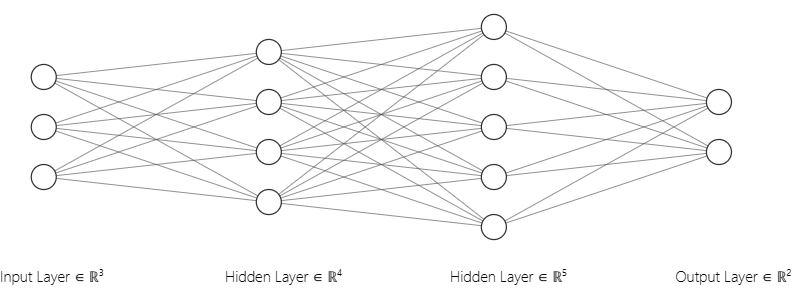

Let's consider a neural network with an input layer, two hidden layers, and an output layer. We'll use variable names to represent the components:

**Neural Network Architecture:**
- Input Layer: 3 neurons (for a 3-dimensional input)
- Hidden Layer 1: 4 neurons
- Hidden Layer 2: 5 neurons
- Output Layer: 2 neurons (for a 2-dimensional output)

**Variables:**
- Input Vector: x = [x₁, x₂, x₃]
- Hidden Layer 1 Vector: h₁ = [h₁₁, h₁₂, h₁₃, h₁₄]
- Hidden Layer 2 Vector: h₂ = [h₂₁, h₂₂, h₂₃, h₂₄, h₂₅]
- Output Layer Vector: y = [y₁, y₂]

**Forward Propagation (Simplified):**
1. Input Layer to Hidden Layer 1:
   ```
   h₁₁ = w₁₁ * x₁ + w₁₂ * x₂ + w₁₃ * x₃ + b₁₁
   h₁₂ = w₁₄ * x₁ + w₁₅ * x₂ + w₁₆ * x₃ + b₁₂
   h₁₃ = w₁₇ * x₁ + w₁₈ * x₂ + w₁₉ * x₃ + b₁₃
   h₁₄ = w₂₀ * x₁ + w₂₁ * x₂ + w₂₂ * x₃ + b₁₄
   ```

2. Hidden Layer 1 to Hidden Layer 2:
   ```
   h₂₁ = w₂₃ * h₁₁ + w₂₄ * h₁₂ + w₂₅ * h₁₃ + w₂₆ * h₁₄ + b₂₁
   h₂₂ = w₂₇ * h₁₁ + w₂₈ * h₁₂ + w₂₉ * h₁₃ + w₃₀ * h₁₄ + b₂₂
   h₂₃ = w₃₁ * h₁₁ + w₃₂ * h₁₂ + w₃₃ * h₁₃ + w₃₄ * h₁₄ + b₂₃
   h₂₄ = w₃₅ * h₁₁ + w₃₆ * h₁₂ + w₃₇ * h₁₃ + w₃₈ * h₁₄ + b₂₄
   h₂₅ = w₃₉ * h₁₁ + w₄₀ * h₁₂ + w₄₁ * h₁₃ + w₄₂ * h₁₄ + b₂₅
   ```



3. Hidden Layer 2 to Output Layer:
   ```
   y₁ = w₄₃ * h₂₁ + w₄₄ * h₂₂ + w₄₅ * h₂₃ + w₄₆ * h₂₄ + w₄₇ * h₂₅ + b₃₁
   y₂ = w₄₈ * h₂₁ + w₄₉ * h₂₂ + w₅₀ * h₂₃ + w₅₁ * h₂₄ + w₅₂ * h₂₅ + b₃₂
   ```

In this example, the vectors contain variables representing the computations within the neural network. The weights (w) and biases (b) are parameters that influence the output of each neuron.

### **Connection Among Neurons and Layers**

We now look at a concise explanation of connections among the neurons and layers:

**Connections Among Neurons:**
- Neurons in one layer are connected to neurons in the subsequent layer.
- Each connection has an associated weight and contributes to the output.

**Weights Matrix:**
- For connections from one layer to another, weights are organized in a matrix.
- Rows correspond to neurons in the current layer, and columns to neurons in the next layer.
- Each element represents the weight of the connection between two neurons.

For example, in a network with:
- 3 neurons in the input layer
- 4 neurons in the hidden layer
- Each neuron connected to every neuron in the next layer

The weights matrix from input to hidden layer might look like:
```
[[w₁₁, w₁₂, w₁₃, w₁₄],
 [w₂₁, w₂₂, w₂₃, w₂₄],
 [w₃₁, w₃₂, w₃₃, w₃₄]]
```

Here, wᵢⱼ represents the weight from neuron i in the input layer to neuron j in the hidden layer.

### **An Example Computation Cycle of NN**

Here's a breakdown of an NN computation with 1 layer having 1 neuron in it:

**Given:**
- Input Vector: X = [x₁, x₂, ...]
- Weights Matrix: W = [[w₁, w₂, ...]]

**Forward Propagation:**
1. Compute Weighted Sum:
   - WeightedSum = X dot W
   - WeightedSum = x₁*w₁ + x₂*w₂ + ...

2. Apply Activation Function (e.g., sigmoid or ReLU):
   - Activation = ActivationFunction(WeightedSum)

3. Output:
   - Output = Activation

**Training Phase:**
- Involves updating weights to minimize the difference between predicted and actual outputs.
- Typically uses techniques like gradient descent to adjust weights iteratively.

**Backpropagation:**
1. Compute Gradient of Loss with Respect to Output:
   - OutputGradient = ∂Loss/∂Output

2. Backpropagate the Gradient through the Activation Function:
   - ActivationGradient = OutputGradient * ActivationFunctionDerivative(WeightedSum)

3. Compute Gradient of Loss with Respect to Weights:
   - WeightGradient = X.T dot ActivationGradient

4. Update Weights:
   - UpdatedWeights = OldWeights - LearningRate * WeightGradient

**Evaluation Phase:**
- Applying the trained network to new data to make predictions.

**Activation Function:**
- Non-linear function applied to the weighted sum.
- Introduces non-linearity to the network, enabling it to model complex relationships.

In summary, the forward propagation computes the output of a single neuron based on input features and weights, while backpropagation calculates gradients and updates weights during training. The activation function introduces non-linearity. Training involves adjusting weights, and evaluation uses the trained network to make predictions on new data.

### **A Slightly Complex Example**

Here's a a slightly complex example of an NN computation with 3 neurons in the hidden layer, and 2 neurons in the output laye:

**Given:**
- Input Vector: X = [x₁, x₂, ..., xₙ]
- Weights and Biases Matrices:
  - Input to Hidden Layer Weights: W_input_hidden
  - Hidden Layer to Output Weights: W_hidden_output
  - Biases for Hidden Layer: B_hidden
  - Biases for Output Layer: B_output

**Computation:**

1. **Hidden Layer:**
   - Compute Weighted Sums for Each Hidden Neuron:
     ```
     Z_h1 = x₁ * w₁₁ + x₂ * w₂₁ + ... + xₙ * wₙ₁ + b_h1
     Z_h2 = x₁ * w₁₂ + x₂ * w₂₂ + ... + xₙ * wₙ₂ + b_h2
     Z_h3 = x₁ * w₁₃ + x₂ * w₂₃ + ... + xₙ * wₙ₃ + b_h3
     ```
   - Apply Activation Function (e.g., sigmoid or ReLU) to Each Weighted Sum:
     ```
     A_h1 = ActivationFunction(Z_h1)
     A_h2 = ActivationFunction(Z_h2)
     A_h3 = ActivationFunction(Z_h3)
     ```

2. **Output Layer:**
   - Compute Weighted Sums for Each Output Neuron:
     ```
     Z_y1 = A_h1 * w_h1_y1 + A_h2 * w_h2_y1 + A_h3 * w_h3_y1 + b_y1
     Z_y2 = A_h1 * w_h1_y2 + A_h2 * w_h2_y2 + A_h3 * w_h3_y2 + b_y2
     ```
   - Apply Activation Function to Each Weighted Sum (if needed):
     ```
     A_y1 = ActivationFunction(Z_y1)
     A_y2 = ActivationFunction(Z_y2)
     ```

**Relating to Linear Combinations:**

- At each neuron in the hidden and output layers, the computation involves linear combinations of inputs, each multiplied by its corresponding weight.
- Biases act as additional constants added to the weighted sums.
- Activation functions introduce non-linearity, allowing the network to model complex relationships beyond simple linear combinations.

In essence, each neuron computes a linear combination of its inputs and biases, which is then transformed using the activation function to produce the final output.

### **Time for reflection!**

**16. What is the role of linear algebra in neural networks?**<br>
a) Linear algebra is not relevant to neural networks.<br>
b) Linear algebra is used for organizing code in neural networks.<br>
c) Linear algebra provides tools for representing and manipulating network computations.<br>
d) Linear algebra only deals with one-dimensional data.

<details>
<summary>Click to reveal the answer</summary>
Correct Answer: c

**17. In a neural network, what are weights used for?**<br>
a) Weights help balance the network architecture.<br>
b) Weights are used to activate neurons.<br>
c) Weights define the strength of connections between neurons.<br>
d) Weights are irrelevant in neural network computations.

<details>
<summary>Click to reveal the answer</summary>
Correct Answer: c

**18. In a neural network, what does the term "forward propagation" refer to?**<br>
a) Calculating the gradients for weight updates.<br>
b) Sending data from output to input layer.<br>
c) Calculating the output predictions from input data.<br>
d) Adjusting biases in the hidden layer.

<details>
<summary>Click to reveal the answer</summary>
Correct Answer: c

**19. What is the purpose of an activation function in a neural network?**<br>
a) It reduces the size of input data.<br>
b) It initializes weights in the network.<br>
c) It ensures that the output of a neuron is within a certain range.<br>
d) It defines the number of layers in the network.

<details>
<summary>Click to reveal the answer</summary>
Correct Answer: c

**20. In forward propagation, what is the result of applying the ReLU activation function to a negative value?**<br>
a) The value remains unchanged.<br>
b) The value becomes zero.<br>
c) The value becomes negative.<br>
d) The value becomes one.

<details>
<summary>Click to reveal the answer</summary>
Correct Answer: b

**21. What is the primary purpose of backpropagation in neural networks?**<br>
a) It calculates the final predictions.<br>
b) It adjusts weights to minimize prediction errors.<br>
c) It computes the initial weights.<br>
d) It updates the biases in the output layer.

<details>
<summary>Click to reveal the answer</summary>
Correct Answer: b

**22. Which layer of a neural network produces the final output, such as predictions or classifications?**<br>
a) Input Layer<br>
b) Hidden Layer<br>
c) Output Layer<br>
d) Activation Layer

<details>
<summary>Click to reveal the answer</summary>
Correct Answer: c

**23. What do the neurons in the hidden layers of a neural network perform?**<br>
a) Receive raw data inputs.<br>
b) Produce the final predictions.<br>
c) Apply weighted sums and activations.<br>
d) Control the overall network architecture.

<details>
<summary>Click to reveal the answer</summary>
Correct Answer: c

**24. In a neural network, what does the input vector consist of?**<br>
a) Neuron activations.<br>
b) Weight values.<br>
c) Feature values or raw data inputs.<br>
d) Bias terms.

<details>
<summary>Click to reveal the answer</summary>
Correct Answer: c

**25. What does the hidden layer vector represent in a neural network?**<br>
a) The final predictions.<br>
b) Weighted sums of input features.<br>
c) Neuron activations in the hidden layer.<br>
d) Bias values.

<details>
<summary>Click to reveal the answer</summary>
Correct Answer: c

## **Exrecises**

**Exercise 1: Single Neuron Computation**<br>
Consider a neural network with a single neuron and the following parameters:

Input: x=3<br>
Weight: w=0.5<br>
Bias: b=−1<br>
Activation Function: ReLU (max(0,x))<br>
Calculate the output of the neuron.

<details>
<summary>Click to reveal the answer</summary>
**Solution:**
The output of the neuron is calculated as follows:<br>
z=(w⋅x)+b=(0.5⋅3)+(−1)=0.5<br>
Output=max(0,z)=max(0,0.5)=0.5

**Exercise 2: Multi-Layer Neural Network**

Consider a neural network with one input layer, one hidden layer (with two neurons and ReLU activation), and one output layer (with a sigmoid activation). The weights and biases are as follows:

Input to Hidden Weights:<br>
W<sub>ih</sub> =<br>
|0.2 0.4|<br>
|0.1 0.3|<br>
​Hidden Biases: b<sub>h</sub>​ = <br>
|−0.1|<br>
|0.2|<br>
Hidden to Output Weights: W<sub>ho</sub> =<br>
|0.5|<br>
|−0.5|<br>
Output Bias: b<sub>o</sub> = 0.3<br>
If the input is =<br>
|0.7|<br>
|0.9|<br>
calculate the final output of the neural network.<br>
h1 = w1x1+w2x2+b1 = 0.2*0.7 + 0.4*0.9 - 0.1 = 0.14 + 0.36 - 0.1 = 0.4 = 0.4<br>
h2 = w3x1+w4x2+b2 = 0.1*0.7 + 0.3*0.9 + 0.2 = 0.07 + 0.27 + 0.2 = 0.54 = 0.54<br>
output<br>
y = w5h1 + w6h2 + bo = 0.5*0.4 + -0.5*0.54 + 0.3 = 0.20-0.27 +0.3 = 0.23 --> sigmoid(0.23) --> 0.557<br>

<details>
<summary>Click to reveal the answer</summary>
**Solution:**

1. Calculate Hidden Layer Activations:<br>
z<sub>h</sub> = W<sub>ih</sub>⋅x+b<sub>h</sub> =<br>
|0.2 0.4| . |0.7| + |-0.1| = |0.58|<br>
|0.1 0.3|   |0.9|   | 0.2|   |0.56|<br>
a<sub>h</sub> =max(0,z<sub>h</sub>) =<br>
|0.58|<br>
|0.86|<br>

2. Calculate Output Layer Activation:
z<sub>o</sub> = W<sub>ho</sub>.a<sub>h</sub> + b<sub>o</sub> = <br>
​| 0.5| . |0.58| + 0.3 = 0.274<br>
|−0.5|&nbsp; |0.86|<br>
​Output = 1/1+e<sup>−z<sub>o</sub></sup> = 1/1+e<sup>−0.274</sup> = 0.568

**Exercise 3: Backpropagation and Weight Update**<br>
Consider a neural network with one input layer, one hidden layer (with two neurons and ReLU activation), and one output layer (with a sigmoid activation). The weights and biases are the same as in Exercise 2.

If the expected output is y=1 and the learning rate is 0.1, perform one iteration of backpropagation to update the weights using the mean squared error loss function.

<details>
<summary>Click to reveal the answer</summary>
**Solution:**

Calculate the Output Error:<br>
Error = Expected Output − Actual Output = 1 − 0.568 = 0.432 <br>

Calculate the Output Layer Gradient:<br>
Output Gradient=Error×Sigmoid Derivative=0.432×(0.568×(1−0.568))=0.119<br>

Backpropagate to Hidden Layer:<br>
Hidden Layer Gradient=Output Gradient×Hidden to Output Weights = <br>
0.119× | 0.5| = |0.0595|<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;       |−0.5|&nbsp;&nbsp;     |−0.0595|<br>
​
Update Weights and Biases:

- Update Hidden to Output Weights and Bias:<br>
New Hidden to Output Weights=Old Hidden to Output Weights+Learning Rate×Output Gradient×Hidden Layer Activations<br>
New Hidden to Output Bias=Old Hidden to Output Bias+Learning Rate×Output Gradient<br>
- Update Input to Hidden Weights and Bias:<br>
New Input to Hidden Weights=Old Input to Hidden Weights+Learning Rate×Hidden Layer Gradient×Input<br>
New Hidden Bias=Old Hidden Bias+Learning Rate×Hidden Layer Gradient<br>

Repeat this process for each neuron and weight.